In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
#This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
ir = pd.DataFrame(iris.data, columns=iris.feature_names)
ir['target']=iris.target

ir.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

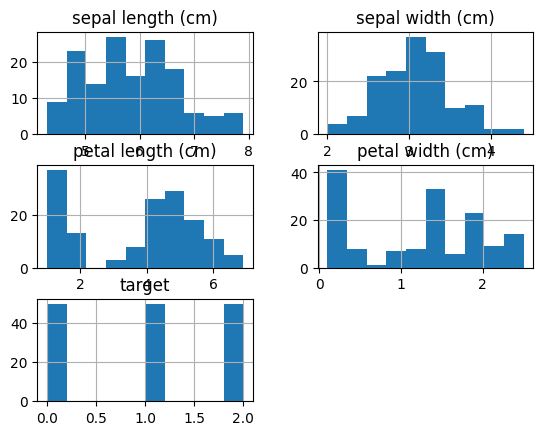

In [ ]:
ir.hist()
plt.show()

<Axes: >

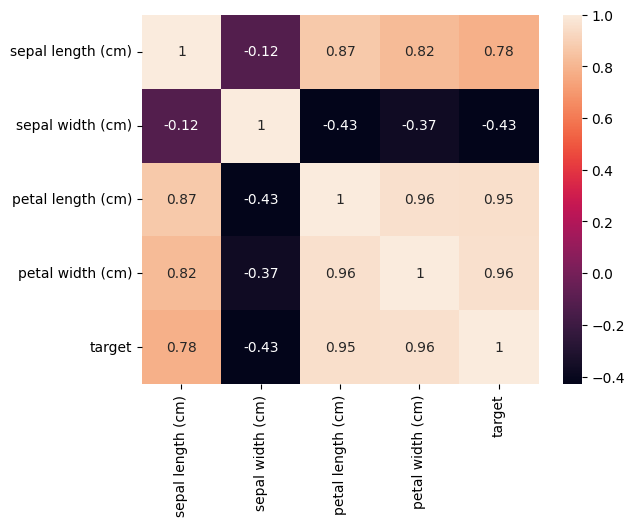

In [ ]:
correlation_matrix = ir.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
X_full = pd.DataFrame(iris.data, columns=iris.feature_names)
Y_full = ir['target']
print(X_full.shape)
X_full.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X_full.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [ ]:
Y_full.head(100)

,target
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


In [ ]:
Y_full.shape

(150,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size = 0.15, random_state=5)

Предобработка

In [ ]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis = 0)
X_train /= std

X_test -= mean
X_test /= std

Создаём сеть

In [ ]:
from tensorflow import keras
model=keras.Sequential([
                      keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
                      keras.layers.Dense(3,activation='softmax')
                        ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,
          batch_size=2,
          epochs=20,
          validation_split=0.2,
          verbose=1)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1576 - loss: 1.4132 - val_accuracy: 0.4615 - val_loss: 0.9978
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4983 - loss: 0.8555 - val_accuracy: 0.7692 - val_loss: 0.7874
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7317 - loss: 0.7916 - val_accuracy: 0.8077 - val_loss: 0.6917
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8274 - loss: 0.6768 - val_accuracy: 0.8077 - val_loss: 0.6367
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8989 - loss: 0.6020 - val_accuracy: 0.8077 - val_loss: 0.5896
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9510 - loss: 0.5670 - val_accuracy: 0.8846 - val_loss: 0.5416
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9461 - loss: 0.4530 - val_accuracy: 0.8846 - val_loss: 0.4973
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9169 - loss: 0.4267 - val_accuracy: 0.8846 - val_loss:

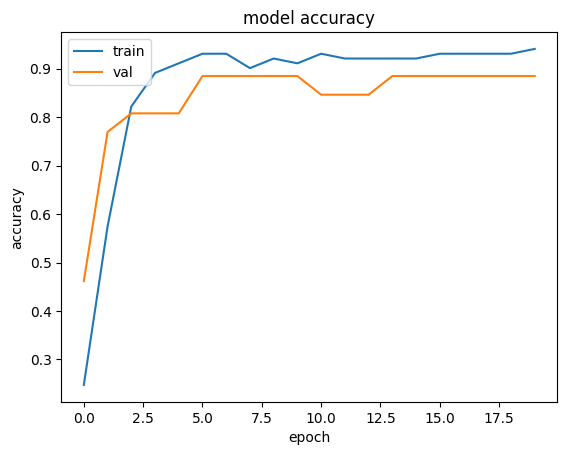

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

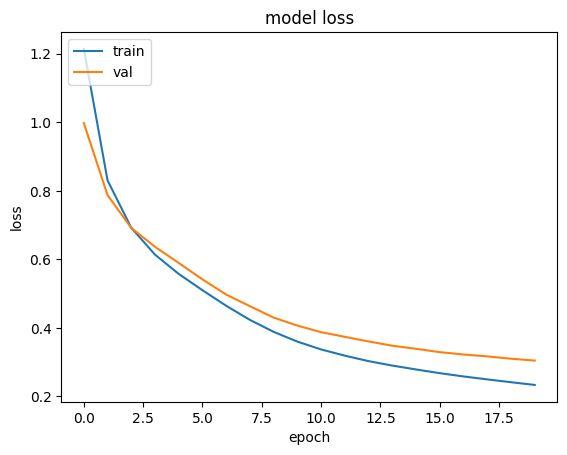

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_loss,test_acc =model.evaluate(X_test,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.8696 - loss: 0.3085


In [ ]:
prediction1=model.predict(X_test)
prediction1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[0.0273792 , 0.85826623, 0.11435455],
       [0.01786789, 0.7813389 , 0.20079331],
       [0.00249587, 0.09379216, 0.90371203],
       [0.99463063, 0.00433315, 0.00103619],
       [0.01243833, 0.02741864, 0.9601429 ],
       [0.0186561 , 0.94726294, 0.03408092],
       [0.94795394, 0.04467578, 0.00737031],
       [0.04029094, 0.2723927 , 0.6873164 ],
       [0.92377007, 0.06572156, 0.0105083 ],
       [0.05314004, 0.5960214 , 0.35083848],
       [0.04241294, 0.5893299 , 0.36825716],
       [0.02319157, 0.5800849 , 0.3967235 ],
       [0.01189935, 0.12201876, 0.86608195],
       [0.01837312, 0.2442453 , 0.7373815 ],
       [0.985144  , 0.01033524, 0.00452064],
       [0.97178334, 0.02005381, 0.00816284],
       [0.00890425, 0.37052745, 0.6205683 ],
       [0.01133124, 0.21623266, 0.7724361 ],
       [0.99239457, 0.00433711, 0.00326836],
       [0.96021837, 0.03468397, 0.00509767],
       [0.03378726, 0.77131903, 0.19489376],
       [0.00548857, 0.16496497, 0.8295465 ],
       [0.

Постройте матрицу ошибок, выведите значения метрик

In [ ]:
prediction_vect = [i.argmax() for i in prediction1]
df=pd.crosstab(Y_test,prediction_vect)
df

col_0,0,1,2
target,,,
0,8,0,0
1,0,5,1
2,0,2,7


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_squared_error, r2_score
print('accuracy',accuracy_score(Y_test,prediction_vect))
print('precision:', precision_score(Y_test, prediction_vect, average='weighted'))
print('recall:', recall_score(Y_test, prediction_vect, average='weighted'))
print("mean squared error:", np.sqrt(mean_squared_error(Y_test, prediction_vect)))
print("r2 score:", r2_score(Y_test, prediction_vect))

accuracy 0.8695652173913043
precision: 0.8765527950310559
recall: 0.8695652173913043
mean squared error: 0.3611575592573076
r2 score: 0.823076923076923


Попробуйте другие параметры оптимизаторов, метрик, других структур сетей

In [ ]:
from tensorflow import keras
model=keras.Sequential([
                      keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                      keras.layers.Dropout(0.2),
                      keras.layers.Dense(32, activation='relu'),
                      keras.layers.Dropout(0.2),
                      keras.layers.Dense(16, activation='relu'),
                      keras.layers.Dropout(0.2),
                      keras.layers.Dense(8, activation='relu'),
                   #   keras.layers.Dropout(0.2),
                      keras.layers.Dense(3, activation='softmax'),
                        ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,091 (12.07 KB)

 Trainable params: 3,091 (12.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,
          batch_size=5,
          epochs=100,
          validation_split=0.2,
          verbose=1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.3254 - loss: 1.1260 - val_accuracy: 0.4615 - val_loss: 1.0315
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4304 - loss: 1.0492 - val_accuracy: 0.7308 - val_loss: 0.9315
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6285 - loss: 0.9265 - val_accuracy: 0.6923 - val_loss: 0.8137
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6714 - loss: 0.8040 - val_accuracy: 0.8462 - val_loss: 0.6929
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7385 - loss: 0.6539 - val_accuracy: 0.8077 - val_loss: 0.6291
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7091 - loss: 0.6345 - val_accuracy: 0.8462 - val_loss: 0.5639
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8385 - loss: 0.4994 - val_accuracy: 0.8077 - val_loss: 0.5111
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8397 - loss: 0.4641 - val_accuracy: 0.8077 - 

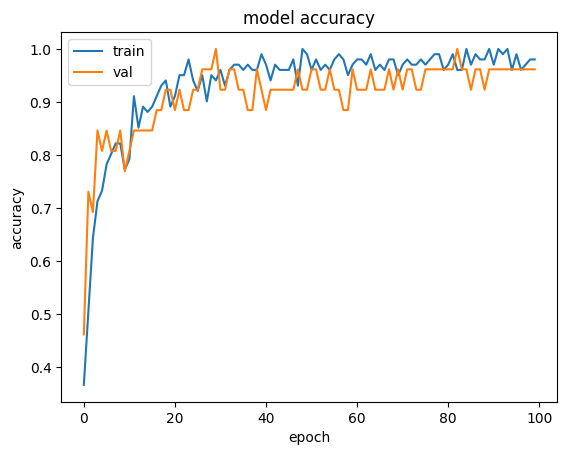

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

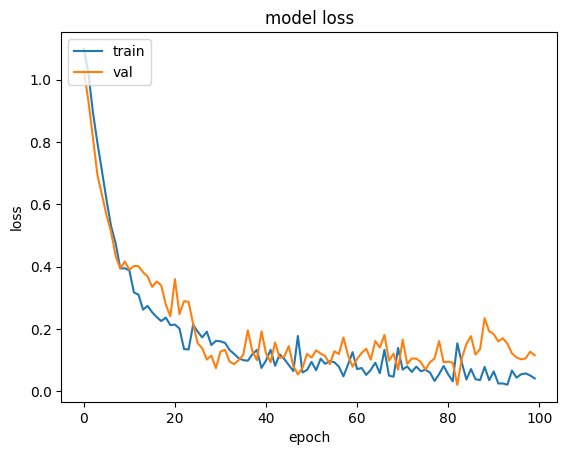

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
prediction=model.predict(X_test)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


array([[7.2624040e-05, 9.9964404e-01, 2.8336170e-04],
       [1.2348437e-04, 8.4473503e-01, 1.5514141e-01],
       [2.1042917e-10, 5.3552219e-05, 9.9994642e-01],
       [9.9999994e-01, 9.9172190e-09, 1.1619810e-17],
       [7.9453909e-12, 6.8593190e-06, 9.9999303e-01],
       [1.0697884e-05, 9.9992031e-01, 6.8939800e-05],
       [9.9999982e-01, 1.0595216e-07, 7.0876260e-16],
       [1.8150351e-05, 2.3163864e-02, 9.7681803e-01],
       [9.9999970e-01, 1.9036698e-07, 2.0305544e-15],
       [4.2488796e-04, 9.7983289e-01, 1.9742066e-02],
       [6.1873830e-04, 9.8850673e-01, 1.0874414e-02],
       [5.3369126e-04, 9.6800429e-01, 3.1462047e-02],
       [4.0043926e-08, 7.5309130e-04, 9.9924695e-01],
       [1.5434044e-06, 7.5730616e-03, 9.9242550e-01],
       [9.9999994e-01, 5.1280196e-08, 3.3421390e-16],
       [9.9999970e-01, 2.8909645e-07, 9.3095494e-15],
       [4.3522807e-05, 3.9637458e-02, 9.6031898e-01],
       [6.4122429e-07, 4.9166414e-03, 9.9508274e-01],
       [1.0000000e+00, 1.021

In [ ]:
prediction_vect = [i.argmax() for i in prediction]
df=pd.crosstab(Y_test,prediction_vect)
df

col_0,0,1,2
target,,,
0,8,0,0
1,0,5,1
2,0,2,7


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_squared_error, r2_score
print('accuracy',accuracy_score(Y_test,prediction_vect))
print('precision:', precision_score(Y_test, prediction_vect, average='weighted'))
print('recall:', recall_score(Y_test, prediction_vect, average='weighted'))
print("mean squared error:", np.sqrt(mean_squared_error(Y_test, prediction_vect)))
print("r2 score:", r2_score(Y_test, prediction_vect))

accuracy 0.8695652173913043
precision: 0.8765527950310559
recall: 0.8695652173913043
mean squared error: 0.3611575592573076
r2 score: 0.823076923076923


In [ ]:
test_loss,test_acc=model.evaluate(X_test,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8696 - loss: 0.3989


In [ ]:
from tensorflow import keras
model=keras.Sequential([
                      keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
                     # keras.layers.Dropout(0.2),
                      keras.layers.Dense(8, activation='relu'),
                    #  keras.layers.Dropout(0.2),
                      keras.layers.Dense(3, activation = 'softmax'),
                        ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train, batch_size=5, epochs=50,validation_split=0.2)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2021 - loss: 1.1947 - val_accuracy: 0.3846 - val_loss: 1.0797
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3195 - loss: 1.0811 - val_accuracy: 0.5385 - val_loss: 0.9912
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5502 - loss: 0.9832 - val_accuracy: 0.5769 - val_loss: 0.9074
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6242 - loss: 0.8955 - val_accuracy: 0.6923 - val_loss: 0.8326
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6747 - loss: 0.8259 - val_accuracy: 0.7692 - val_loss: 0.7766
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7549 - loss: 0.7336 - val_accuracy: 0.7692 - val_loss: 0.7267
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7562 - loss: 0.6683 - val_accuracy: 0.7692 - val_loss: 0.6894
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7928 - loss: 0.7214 - val_accuracy: 0.7692 - val_loss

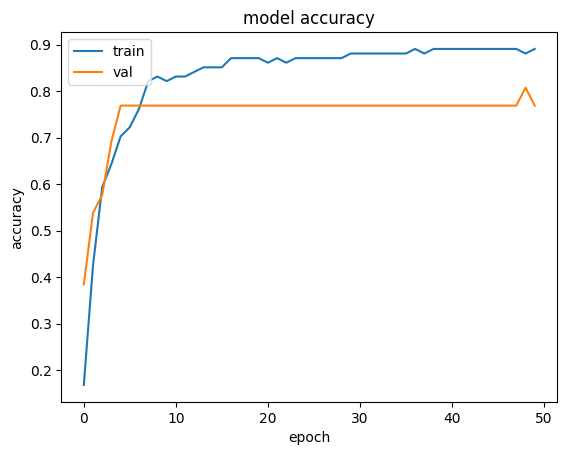

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

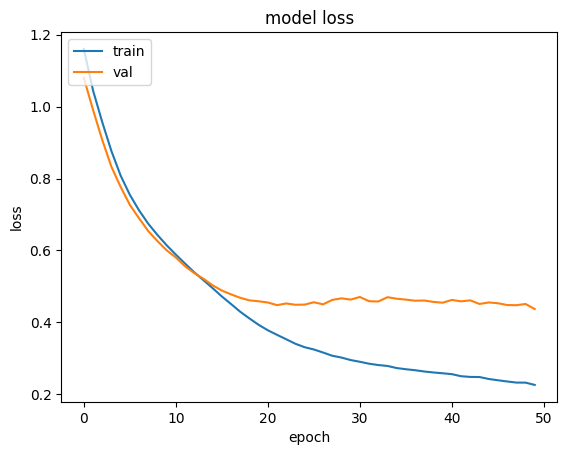

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
prediction=model.predict(X_test)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


array([[1.15553793e-02, 9.20784652e-01, 6.76598474e-02],
       [4.19827737e-03, 7.98649311e-01, 1.97152287e-01],
       [8.12647631e-04, 2.96428740e-01, 7.02758610e-01],
       [9.98836815e-01, 1.15395174e-03, 9.26482790e-06],
       [3.53050418e-05, 3.64977270e-02, 9.63467002e-01],
       [1.10539347e-02, 9.83758509e-01, 5.18759340e-03],
       [9.92507577e-01, 7.32778618e-03, 1.64735073e-04],
       [5.61509933e-03, 5.78135729e-01, 4.16249067e-01],
       [9.87542689e-01, 1.21135497e-02, 3.43699532e-04],
       [1.34077556e-02, 9.56612170e-01, 2.99799815e-02],
       [1.16235381e-02, 9.19539690e-01, 6.88366964e-02],
       [3.79819958e-03, 5.43635488e-01, 4.52566326e-01],
       [7.87699901e-05, 8.30586329e-02, 9.16862547e-01],
       [1.06906351e-04, 1.02618694e-01, 8.97274435e-01],
       [9.97028410e-01, 2.91625829e-03, 5.53840691e-05],
       [9.93039250e-01, 6.81102974e-03, 1.49757077e-04],
       [1.51124166e-03, 3.98967355e-01, 5.99521399e-01],
       [5.31811675e-05, 9.34529

In [ ]:
prediction_vect = [i.argmax() for i in prediction]
df=pd.crosstab(Y_test,prediction_vect)
df

col_0,0,1,2
target,,,
0,8,0,0
1,0,6,0
2,0,2,7


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_squared_error, r2_score
print('accuracy',accuracy_score(Y_test,prediction_vect))
print('precision:', precision_score(Y_test, prediction_vect, average='weighted'))
print('recall:', recall_score(Y_test, prediction_vect, average='weighted'))
print("mean squared error:", np.sqrt(mean_squared_error(Y_test, prediction_vect)))
print("r2 score:", r2_score(Y_test, prediction_vect))

accuracy 0.9130434782608695
precision: 0.9347826086956522
recall: 0.9130434782608695
mean squared error: 0.29488391230979427
r2 score: 0.882051282051282


In [ ]:
test_loss,test_acc=model.evaluate(X_test,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9130 - loss: 0.2095


In [ ]:
# increase Features
from sklearn.preprocessing import PolynomialFeatures, scale
from sklearn.datasets import load_iris
iris = load_iris()
XX, yy = iris.data, iris.target
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(XX))
print(X_poly.shape)
XX_train, XX_test, yy_train, yy_test = train_test_split(X_poly, yy, random_state=42)

(150, 14)


In [ ]:
model1=keras.Sequential([
                      keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
                      keras.layers.Dense(10, activation='relu'),
                      #keras.layers.Dropout(rate=0.2),
                      keras.layers.Dense(3,activation='softmax')
                        ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1=model1.fit(X_train,Y_train,
          batch_size=3,
          epochs=20,
          validation_split=0.2,
          verbose=1)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.2821 - loss: 1.1138 - val_accuracy: 0.4231 - val_loss: 1.0424
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4435 - loss: 1.0398 - val_accuracy: 0.4615 - val_loss: 0.9863
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6374 - loss: 0.9652 - val_accuracy: 0.5769 - val_loss: 0.9284
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6508 - loss: 0.8941 - val_accuracy: 0.6538 - val_loss: 0.8694
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7267 - loss: 0.8451 - val_accuracy: 0.8077 - val_loss: 0.8113
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8560 - loss: 0.8214 - val_accuracy: 0.8077 - val_loss: 0.7581
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8393 - loss: 0.7561 - val_accuracy: 0.8846 - val_loss: 0.7114
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9083 - loss: 0.7165 - val_accuracy: 0.8846 - val

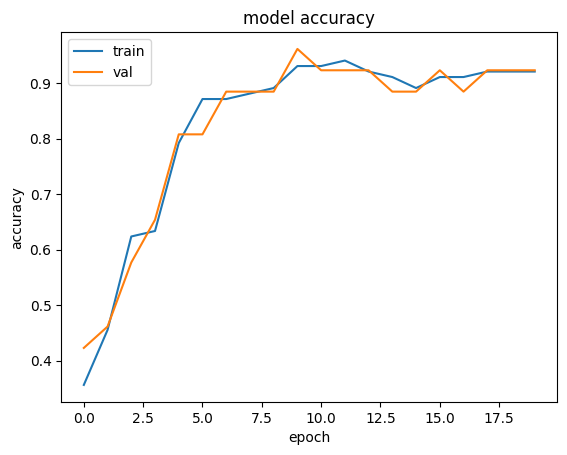

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

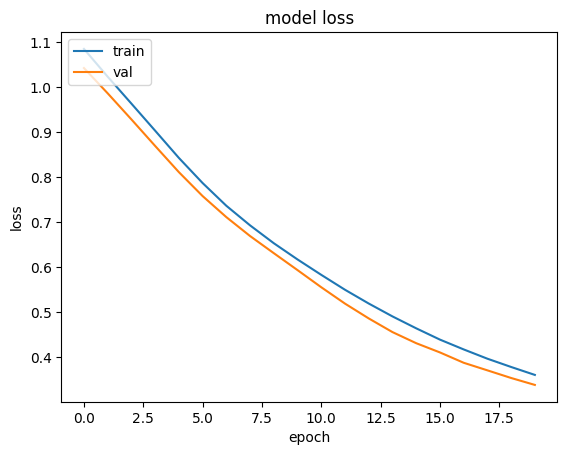

In [ ]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_loss,test_acc=model1.evaluate(X_test,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9130 - loss: 0.3437


In [ ]:
prediction2=model1.predict(X_test)
prediction2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


array([[0.1118882 , 0.6191443 , 0.26896757],
       [0.0699284 , 0.46958703, 0.46048456],
       [0.05859308, 0.24615471, 0.69525224],
       [0.9894854 , 0.0057649 , 0.00474969],
       [0.03164791, 0.06794282, 0.9004093 ],
       [0.16731259, 0.5723509 , 0.26033637],
       [0.95451987, 0.02678687, 0.01869325],
       [0.09834129, 0.3506164 , 0.5510423 ],
       [0.93908334, 0.03633269, 0.02458399],
       [0.12237135, 0.5162094 , 0.36141917],
       [0.11651485, 0.5018641 , 0.3816211 ],
       [0.08215051, 0.44342202, 0.47442746],
       [0.04056495, 0.15422195, 0.8052131 ],
       [0.04144211, 0.19047812, 0.76807976],
       [0.97143203, 0.01631059, 0.01225736],
       [0.9490589 , 0.0298467 , 0.02109445],
       [0.07231332, 0.3943942 , 0.5332925 ],
       [0.03888975, 0.18972762, 0.77138263],
       [0.9829177 , 0.00974905, 0.00733327],
       [0.9653777 , 0.02017285, 0.01444952],
       [0.1116774 , 0.5975908 , 0.29073182],
       [0.04876146, 0.22707298, 0.72416556],
       [0.

Не забудьте о матрице ошибок и выводе метрик

In [ ]:
prediction_vect2 = [i.argmax() for i in prediction2]
df=pd.crosstab(Y_test,prediction_vect2)
df

col_0,0,1,2
target,,,
0,8,0,0
1,0,5,1
2,0,1,8


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_squared_error, r2_score
print('accuracy',accuracy_score(Y_test,prediction_vect2))
print('precision:', precision_score(Y_test, prediction_vect2, average='weighted'))
print('recall:', recall_score(Y_test, prediction_vect2, average='weighted'))
print("mean squared error:", np.sqrt(mean_squared_error(Y_test, prediction_vect2)))
print("r2 score:", r2_score(Y_test, prediction_vect2))

accuracy 0.9130434782608695
precision: 0.9130434782608695
recall: 0.9130434782608695
mean squared error: 0.29488391230979427
r2 score: 0.882051282051282


Создайте нейронные сети (Dense)  для каждой вашей задачи

# Беру на примере Титаника

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Введение в нейронные сети/Занятие 9/train.csv',index_col='PassengerId')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,Male,22.0,1,0,7.2500,3
2,1,1,female,38.0,1,0,71.2833,1
3,1,3,female,26.0,0,0,7.9250,3
4,1,1,female,35.0,1,0,53.1000,3
5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
887,0,2,Male,27.0,0,0,13.0000,3
888,1,1,female,19.0,0,0,30.0000,3
889,0,3,female,60.0,1,2,23.4500,3


In [ ]:
dft = pd.read_csv('/content/drive/MyDrive/Введение в нейронные сети/Занятие 9/test.csv',index_col='PassengerId')
dft

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [ ]:
dft.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
dft

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,0,3,male,34.5,0,0,7.8292,Q
893,1,3,female,47.0,1,0,7.0000,S
894,0,2,male,62.0,0,0,9.6875,Q
895,0,3,male,27.0,0,0,8.6625,S
896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
1305,0,3,male,NaN,0,0,8.0500,S
1306,1,1,female,39.0,0,0,108.9000,C
1307,0,3,male,38.5,0,0,7.2500,S


In [ ]:
emb_scale = {'Q': 2, 'C': 1, 'S': 3, np.nan: 1}
dft['Embarked'] = dft['Embarked'].replace(emb_scale).astype('int8')

dft['Age'] = dft['Age'].fillna(28).astype('float32')
dft['Fare'] = dft['Fare'].fillna(0).astype('float32')

print(dft.isna().sum())
dft

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,0,3,male,34.5,0,0,7.829200,2
893,1,3,female,47.0,1,0,7.000000,3
894,0,2,male,62.0,0,0,9.687500,2
895,0,3,male,27.0,0,0,8.662500,3
896,1,3,female,22.0,1,1,12.287500,3
...,...,...,...,...,...,...,...,...
1305,0,3,male,28.0,0,0,8.050000,3
1306,1,1,female,39.0,0,0,108.900002,1
1307,0,3,male,38.5,0,0,7.250000,3


In [ ]:
df=pd.concat([df,dft])

In [ ]:
sex_scale={'female':1,'male':0,'Male':0,'Female':1}
df['Sex'].replace(sex_scale)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.250000,3
2,1,1,1,38.0,1,0,71.283300,1
3,1,3,1,26.0,0,0,7.925000,3
4,1,1,1,35.0,1,0,53.100000,3
5,0,3,0,35.0,0,0,8.050000,3
...,...,...,...,...,...,...,...,...
1305,0,3,0,28.0,0,0,8.050000,3
1306,1,1,1,39.0,0,0,108.900002,1
1307,0,3,0,38.5,0,0,7.250000,3


In [ ]:
Y=df['Survived']
Y

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
1305,0
1306,1
1307,0


In [ ]:
X=df.drop(['Survived'],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.250000,3
2,1,1,38.0,1,0,71.283300,1
3,3,1,26.0,0,0,7.925000,3
4,1,1,35.0,1,0,53.100000,3
5,3,0,35.0,0,0,8.050000,3
...,...,...,...,...,...,...,...
1305,3,0,28.0,0,0,8.050000,3
1306,1,1,39.0,0,0,108.900002,1
1307,3,0,38.5,0,0,7.250000,3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=5)

In [ ]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis = 0)
X_train /= std

X_test -= mean
X_test /= std

In [ ]:
from tensorflow import keras
model3=keras.Sequential([
                      keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                      keras.layers.Dropout(0.2),
                      keras.layers.Dense(32, activation='relu'),
                      keras.layers.Dropout(0.2),
                      keras.layers.Dense(1, activation='sigmoid'),
                        ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history3=model3.fit(X_train,Y_train,
          batch_size=32,
          epochs=50,
          validation_split=0.2,
          verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6485 - loss: 0.6447 - val_accuracy: 0.8305 - val_loss: 0.4992
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8371 - loss: 0.4638 - val_accuracy: 0.8432 - val_loss: 0.4276
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8475 - loss: 0.4122 - val_accuracy: 0.8390 - val_loss: 0.4109
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8592 - loss: 0.3786 - val_accuracy: 0.8390 - val_loss: 0.4026
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8551 - loss: 0.3818 - val_accuracy: 0.8475 - val_loss: 0.4029
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8590 - loss: 0.3729 - val_accuracy: 0.8432 - val_loss: 0.4005
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8740 - loss: 0.3520 - val_accuracy: 0.8475 - val_loss: 0.4046
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8406 - loss: 0.3914 - val_accuracy: 0.8432 - val_loss

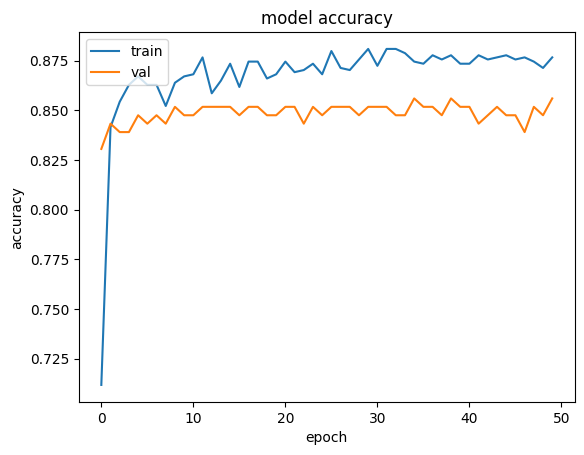

In [ ]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

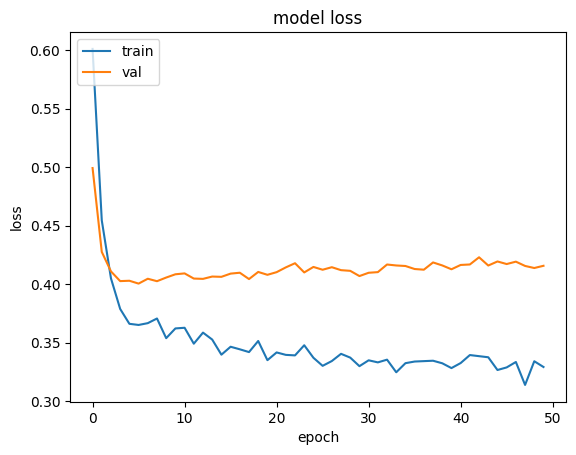

In [ ]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
prediction3=model3.predict(X_test)
prediction3

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.8837865 ],
       [0.9167142 ],
       [0.8948653 ],
       [0.97573334],
       [0.7377092 ],
       [0.07518746],
       [0.06399942],
       [0.08506896],
       [0.05572711],
       [0.09566192],
       [0.22238114],
       [0.98877466],
       [0.15894818],
       [0.08626311],
       [0.8618889 ],
       [0.55975026],
       [0.05843383],
       [0.13049115],
       [0.08101614],
       [0.08119048],
       [0.0530885 ],
       [0.28536415],
       [0.36277303],
       [0.22238342],
       [0.8714093 ],
       [0.01267167],
       [0.05268883],
       [0.54584247],
       [0.05318106],
       [0.0714719 ],
       [0.10156868],
       [0.07475895],
       [0.06027357],
       [0.13566293],
       [0.07412496],
       [0.82650095],
       [0.95145273],
       [0.8836252 ],
       [0.89530414],
       [0.07530928],
       [0.530838  ],
       [0.22810943],
       [0.07714047],
       [0.99508756],
       [0.62236613],
       [0.9899008 ],
       [0.98041886],
       [0.914

In [ ]:
prediction_vect3 = [i.argmax() for i in prediction3]
df=pd.crosstab(Y_test,prediction_vect3)
df

col_0,0
Survived,
0,84
1,47


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_squared_error, r2_score
print('accuracy',accuracy_score(Y_test,prediction_vect3))
print('precision:', precision_score(Y_test, prediction_vect3, average='weighted'))
print('recall:', recall_score(Y_test, prediction_vect3, average='weighted'))
print("mean squared error:", np.sqrt(mean_squared_error(Y_test, prediction_vect3)))
print("r2 score:", r2_score(Y_test, prediction_vect3))

accuracy 0.6412213740458015
precision: 0.4111648505331857
recall: 0.6412213740458015
mean squared error: 0.5989813235437299
r2 score: -0.55952380952381


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
test_loss,test_acc=model3.evaluate(X_test,Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8536 - loss: 0.3343


# Дома в Калифорнии

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загрузка датасета
wine_data = load_wine()
X = wine_data.data
Y = wine_data.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)



.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


In [ ]:
Y_train -= np.min(Y_train)
Y_test -= np.min(Y_test)

In [ ]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis = 0)
X_train /= std

X_test -= mean
X_test /= std

In [ ]:
from tensorflow import keras
model4=keras.Sequential([
                      keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                  #    keras.layers.Dropout(0.2),
                      keras.layers.Dense(32, activation='relu'),
                  #    keras.layers.Dropout(0.2),
                      keras.layers.Dense(3, activation = 'softmax'),
                        ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,075 (12.01 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history4=model4.fit(X_train,Y_train,
          batch_size=16,
          epochs=20,
          validation_split=0.2,
          verbose=2)

Epoch 1/20
8/8 - 3s - 368ms/step - accuracy: 0.4248 - loss: 1.1150 - val_accuracy: 0.5517 - val_loss: 0.9472
Epoch 2/20
8/8 - 0s - 23ms/step - accuracy: 0.6991 - loss: 0.8509 - val_accuracy: 0.7241 - val_loss: 0.7390
Epoch 3/20
8/8 - 0s - 30ms/step - accuracy: 0.8761 - loss: 0.6670 - val_accuracy: 0.8621 - val_loss: 0.6024
Epoch 4/20
8/8 - 0s - 15ms/step - accuracy: 0.9027 - loss: 0.5335 - val_accuracy: 0.8621 - val_loss: 0.5047
Epoch 5/20
8/8 - 0s - 18ms/step - accuracy: 0.9381 - loss: 0.4280 - val_accuracy: 0.8966 - val_loss: 0.4283
Epoch 6/20
8/8 - 0s - 18ms/step - accuracy: 0.9469 - loss: 0.3466 - val_accuracy: 0.8966 - val_loss: 0.3684
Epoch 7/20
8/8 - 0s - 18ms/step - accuracy: 0.9646 - loss: 0.2836 - val_accuracy: 0.8966 - val_loss: 0.3164
Epoch 8/20
8/8 - 0s - 14ms/step - accuracy: 0.9735 - loss: 0.2302 - val_accuracy: 0.9310 - val_loss: 0.2774
Epoch 9/20
8/8 - 0s - 17ms/step - accuracy: 0.9735 - loss: 0.1890 - val_accuracy: 0.9655 - val_loss: 0.2434
Epoch 10/20
8/8 - 0s - 17ms

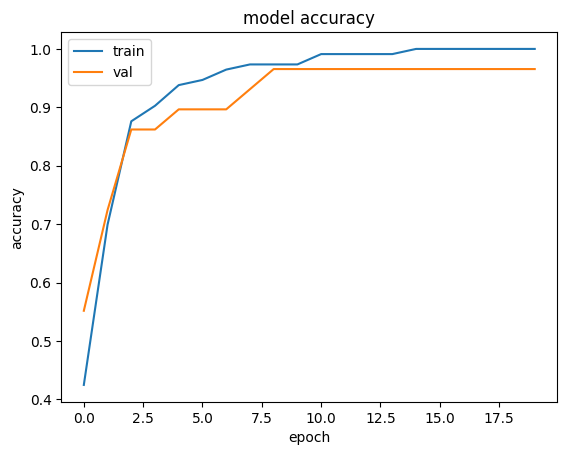

In [ ]:
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

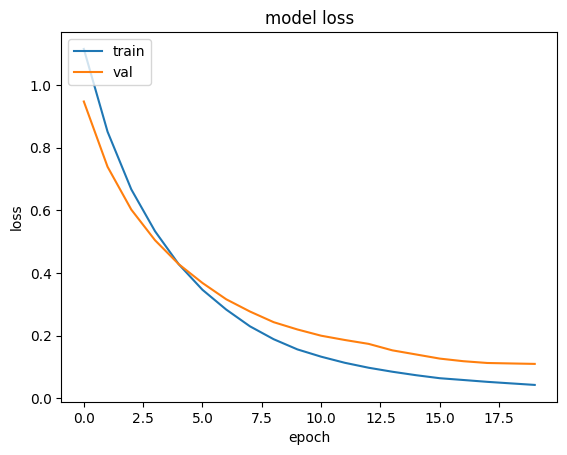

In [ ]:
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
prediction4=model4.predict(X_test)
prediction4

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[9.84564960e-01, 1.46020828e-02, 8.32964957e-04],
       [3.18675600e-02, 9.66149271e-01, 1.98308355e-03],
       [9.99701977e-01, 2.39507674e-04, 5.85385351e-05],
       [9.91758466e-01, 5.84642449e-03, 2.39498075e-03],
       [1.36180199e-03, 5.63332662e-02, 9.42305028e-01],
       [4.49601468e-03, 1.02016777e-02, 9.85302329e-01],
       [9.82049227e-01, 1.34022282e-02, 4.54845838e-03],
       [9.79568362e-01, 1.78675111e-02, 2.56408355e-03],
       [4.18792069e-01, 5.77993035e-01, 3.21502495e-03],
       [7.51486897e-01, 2.45601311e-01, 2.91175442e-03],
       [9.98318851e-01, 1.48660212e-03, 1.94481792e-04],
       [9.85314071e-01, 1.14527345e-02, 3.23318155e-03],
       [8.25826824e-03, 7.00319409e-02, 9.21709716e-01],
       [5.81269944e-03, 9.91981566e-01, 2.20567663e-03],
       [8.32092890e-04, 2.41532624e-02, 9.75014627e-01],
       [9.78334904e-01, 1.65179521e-02, 5.14720147e-03],
       [2.32376456e-02, 9.70387340e-01, 6.37503527e-03],
       [6.34820163e-01, 3.29873

In [ ]:
prediction_vect4 = [i.argmax() for i in prediction4]
df=pd.crosstab(Y_test,prediction_vect4)
df

col_0,0,1,2
row_0,,,
0,17,0,0
1,0,11,0
2,0,0,8


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_squared_error, r2_score
print('accuracy',accuracy_score(Y_test,prediction_vect4))
print('precision:', precision_score(Y_test, prediction_vect4, average='weighted'))
print('recall:', recall_score(Y_test, prediction_vect4, average='weighted'))
print("mean squared error:", np.sqrt(mean_squared_error(Y_test, prediction_vect4)))
print("r2 score:", r2_score(Y_test, prediction_vect4))

accuracy 1.0
precision: 1.0
recall: 1.0
mean squared error: 0.0
r2 score: 1.0


In [ ]:
test_loss,test_acc=model4.evaluate(X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.0742


# Дома в Калифорнии

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

california_housing = fetch_california_housing()
X = california_housing.data
Y = california_housing.target


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model5.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history5=model5.fit(X_train,Y_train,
          batch_size=16,
          epochs=50,
          validation_split=0.2,
          verbose=2)

Epoch 1/50
826/826 - 7s - 8ms/step - loss: 0.8180 - mae: 0.5398 - val_loss: 0.3645 - val_mae: 0.4304
Epoch 2/50
826/826 - 2s - 2ms/step - loss: 0.3642 - mae: 0.4272 - val_loss: 0.3531 - val_mae: 0.4290
Epoch 3/50
826/826 - 2s - 3ms/step - loss: 0.3626 - mae: 0.4190 - val_loss: 0.3325 - val_mae: 0.4036
Epoch 4/50
826/826 - 2s - 3ms/step - loss: 0.3396 - mae: 0.4052 - val_loss: 0.3164 - val_mae: 0.3970
Epoch 5/50
826/826 - 2s - 2ms/step - loss: 0.3179 - mae: 0.3922 - val_loss: 0.3214 - val_mae: 0.3852
Epoch 6/50
826/826 - 2s - 3ms/step - loss: 0.3092 - mae: 0.3854 - val_loss: 0.3033 - val_mae: 0.3756
Epoch 7/50
826/826 - 3s - 3ms/step - loss: 0.3090 - mae: 0.3817 - val_loss: 0.3108 - val_mae: 0.3756
Epoch 8/50
826/826 - 3s - 3ms/step - loss: 0.3027 - mae: 0.3775 - val_loss: 0.2943 - val_mae: 0.3697
Epoch 9/50
826/826 - 3s - 3ms/step - loss: 0.2959 - mae: 0.3755 - val_loss: 0.2853 - val_mae: 0.3646
Epoch 10/50
826/826 - 3s - 4ms/step - loss: 0.2888 - mae: 0.3686 - val_loss: 0.2942 - val_m

In [ ]:
prediction5=model5.predict(X_test)
prediction5

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step


array([[1.3396754],
       [2.1489255],
       [2.005872 ],
       ...,
       [2.469136 ],
       [1.2590773],
       [0.7236279]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model5.predict(X_test).flatten()

print("RMSE:", np.sqrt(mean_squared_error(Y_test, predictions)))
print("R² score:", r2_score(Y_test, predictions))


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 0.5214035458787443
R² score: 0.8029536842275125


In [ ]:
test_loss,test_acc=model5.evaluate(X_test,Y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2777 - mae: 0.3480  


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model5.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error: 0.27
Mean Absolute Error: 0.35
R2 Score: 0.80


# доп


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


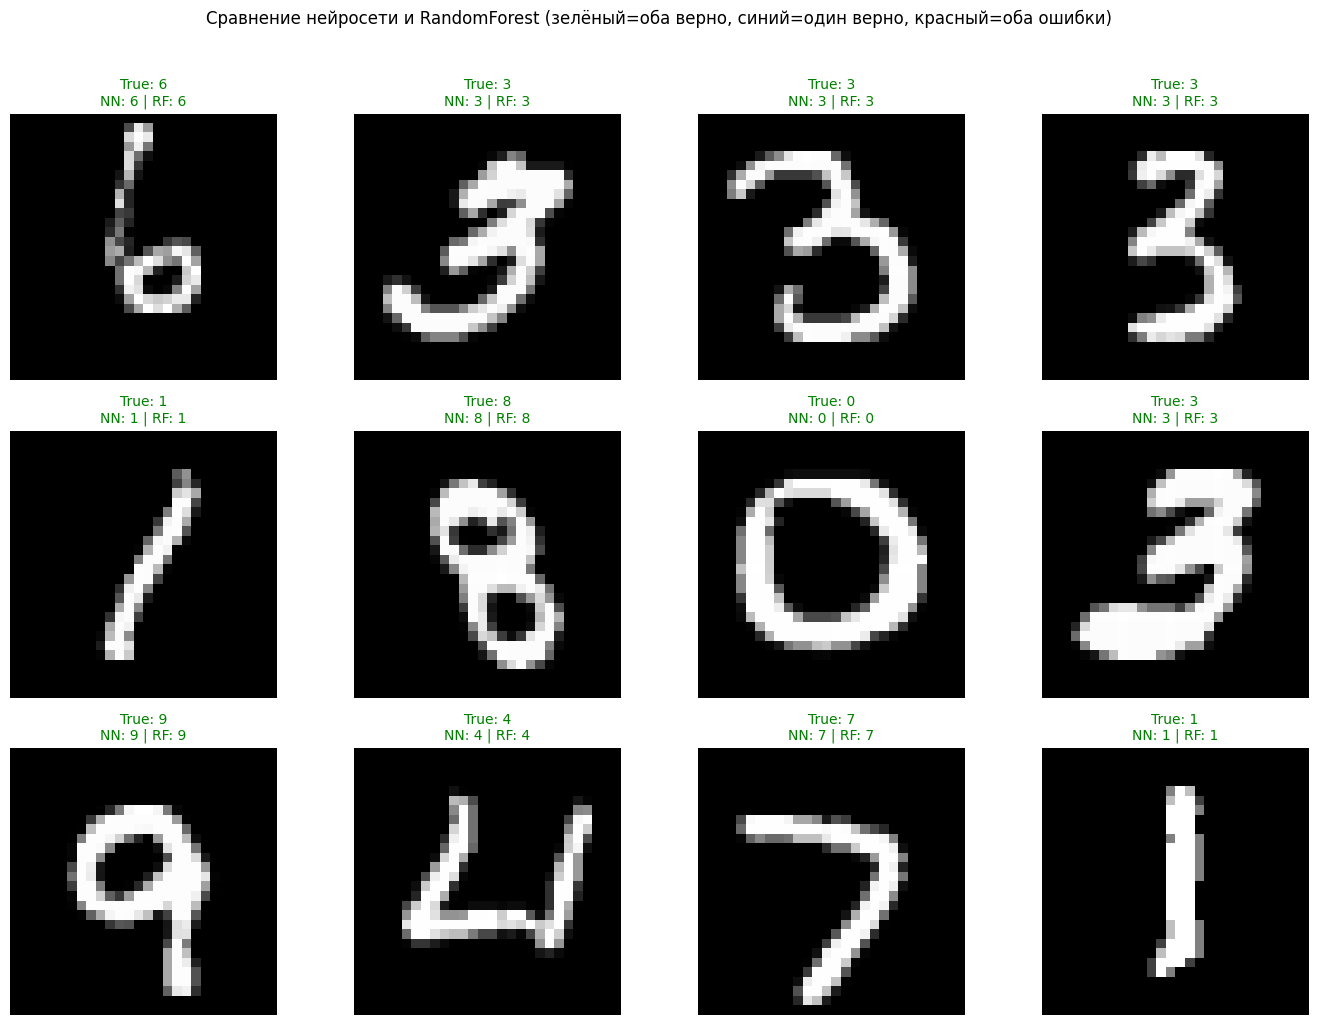


Анализ ошибок:


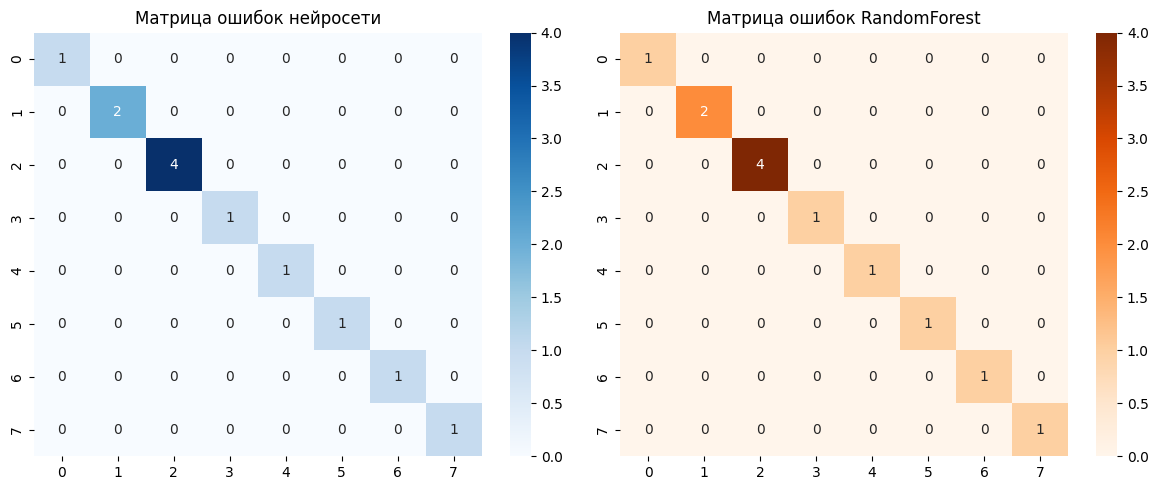

Нейросеть: 0.9798
RandomForest: 0.9486


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train_flat, y_train, epochs=10, validation_split=0.2, verbose=0)


rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_flat, y_train)

sample_indices = list(np.random.choice(len(X_test), 8, replace=False)) + \
                 [np.where(y_test == 9)[0][10],
                  np.where(y_test == 4)[0][5],
                  np.where(y_test == 7)[0][1],
                  np.where(y_test == 1)[0][2]]

samples = X_test[sample_indices]
labels = y_test[sample_indices]


nn_pred = model.predict(X_test_flat[sample_indices], verbose=0).argmax(axis=1)
rf_pred = rf.predict(X_test_flat[sample_indices])

# Визуализация
plt.figure(figsize=(14, 10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(samples[i], cmap='gray')
    true_label = labels[i]

    # Цвет заголовка: зелёный = оба верно, синий = один верно, красный = оба ошиблись
    if nn_pred[i] == true_label and rf_pred[i] == true_label:
        title_color = 'green'
    elif nn_pred[i] == true_label or rf_pred[i] == true_label:
        title_color = 'blue'
    else:
        title_color = 'red'

    plt.title(f"True: {true_label}\nNN: {nn_pred[i]} | RF: {rf_pred[i]}",
              color=title_color, fontsize=10)
    plt.axis('off')

plt.suptitle("Сравнение нейросети и RandomForest (зелёный=оба верно, синий=один верно, красный=оба ошибки)", y=1.02)
plt.tight_layout()
plt.show()

# Анализ ошибок
print("\nАнализ ошибок:")
for i in range(12):
    if nn_pred[i] != labels[i] or rf_pred[i] != labels[i]:
        print(f"Изображение {i+1}: True={labels[i]}, NN={nn_pred[i]}, RF={rf_pred[i]}")

# Матрицы ошибок
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(labels, nn_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Матрица ошибок нейросети")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(labels, rf_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Матрица ошибок RandomForest")
plt.tight_layout()
plt.show()

# Полная оценка на тестовом наборе
nn_test_pred = model.predict(X_test_flat, verbose=0).argmax(axis=1)
rf_test_pred = rf.predict(X_test_flat)

print(f"Нейросеть: {accuracy_score(y_test, nn_test_pred):.4f}")
print(f"RandomForest: {accuracy_score(y_test, rf_test_pred):.4f}")